# Maximum Drawdown Volatility Measure

A notebook dedicated to understanding volatility measures on real-world data. 

**Maximum Drawdown:** A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period. It can be used both as a stand-alone measure or as an input into other metrics such as "Return over Maximum Drawdown" and the Calmar Ratio. Maximum Drawdown is expressed in percentage terms.

**Formula**

$MDD = \frac{Trough Value - Peak Value}{Peak Value}$


## Import Necessary libraries

In [1]:
# Data Analysis
import numpy as np 
import pandas as pd 

# Data Visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns

## Read in the data 

In [2]:
monthly_data = pd.read_csv('C:/Users/Younes/PycharmProjects/finance-courses/data/Portfolios_Formed_on_ME_monthly_EW.csv',
                           header=0, index_col=0, parse_dates=True, na_values=-99.99)
monthly_data.shape

(1110, 19)

In [3]:
# Let's look at the data
monthly_data.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [5]:
# Extract the data
returns = monthly_data[['Lo 20', 'Hi 20']]
returns.columns = ['SmallCap', 'LargeCap']
returns.head()

,SmallCap,LargeCap
192607,-0.57,3.33
192608,3.84,2.33
192609,-0.48,-0.09
192610,-3.29,-2.95
192611,-0.55,3.16


In [6]:
# Convert Returns to percentages 
returns = returns/100
returns

,SmallCap,LargeCap
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316
...,...,...
201808,0.0309,0.0249
201809,-0.0204,0.0019
201810,-0.1052,-0.0741
201811,-0.0278,0.0249


Plot the returns to see the trend.

<AxesSubplot:>

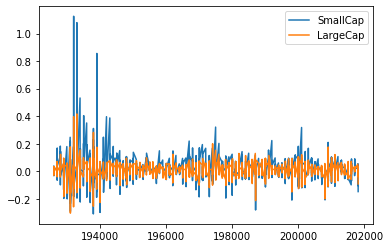

In [7]:
# Make a line plot of the returns
returns.plot.line()

The index is actually messed up and we need to fix this by converting it to time series to get better visualisations. 

In [8]:
returns.index = pd.to_datetime(returns.index, format="%Y%m")
returns

,SmallCap,LargeCap
1926-07-01,-0.0057,0.0333
1926-08-01,0.0384,0.0233
1926-09-01,-0.0048,-0.0009
1926-10-01,-0.0329,-0.0295
1926-11-01,-0.0055,0.0316
...,...,...
2018-08-01,0.0309,0.0249
2018-09-01,-0.0204,0.0019
2018-10-01,-0.1052,-0.0741
2018-11-01,-0.0278,0.0249


This looks a lot better. Now, we have monthly data for each small cap index and large cap index from the year 1926 to 2018. Pretty cool! However, the time stamp is given as first of the month however, these are the monthly averaged returns. So, we don't really need the date and we can just save the month-year representation. 

In [9]:
returns.index = returns.index.to_period('M')
returns

,SmallCap,LargeCap
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316
...,...,...
2018-08,0.0309,0.0249
2018-09,-0.0204,0.0019
2018-10,-0.1052,-0.0741
2018-11,-0.0278,0.0249


<AxesSubplot:>

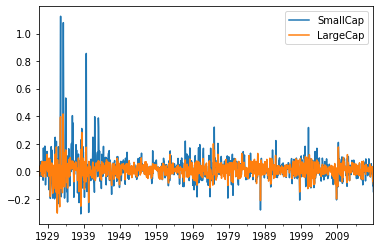

In [10]:
# Plot the data again 
returns.plot.line()

Since the index is in time series format, we can do a lot of data manipulation using dates very easily. We can quickly extract the sections as well. 

In [11]:
# Get the data in the year 1960 
returns['1960']

<ipython-input-11-e5ad5a49e2b5>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  returns['1960']


,SmallCap,LargeCap
1960-01,-0.0051,-0.0582
1960-02,-0.0009,0.0087
1960-03,-0.0280,-0.0121
1960-04,-0.0297,-0.0085
1960-05,-0.0015,0.0367
1960-06,0.0179,0.0238
1960-07,-0.0128,-0.0253
1960-08,0.0572,0.0301
1960-09,-0.0610,-0.0586
1960-10,-0.0312,-0.0054


## Compute Drawdowns 

Steps to compute the drawdowns. 

1. **Compute the Wealth Index:** Value of a portfolio when it compounds over time over returns. 
2. **Compute the previous peak** 
3. **Compute drawdown** 

Let's start with LargeCap data.

In [12]:
# Compute the wealth index by starting with 1000 dollars
# The starting value won't matter with drawdowns

wealth_index = 1000*(1+returns['LargeCap']).cumprod()
wealth_index.head()

1926-07    1033.300000
1926-08    1057.375890
1926-09    1056.424252
1926-10    1025.259736
1926-11    1057.657944
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot:>

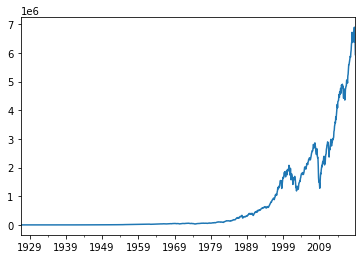

In [13]:
# Plot the wealth index over time 
wealth_index.plot.line()

The cumulative effect is evident. 

In [14]:
# Compute the previous peaks 
previous_peaks = wealth_index.cummax()
previous_peaks.head()

1926-07    1033.300000
1926-08    1057.375890
1926-09    1057.375890
1926-10    1057.375890
1926-11    1057.657944
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot:>

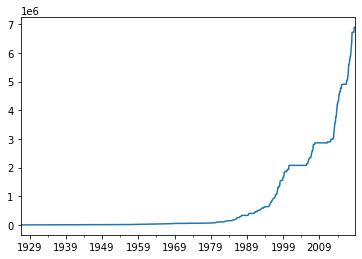

In [15]:
# Plot the previous peaks
previous_peaks.plot.line()

This is line is always moving upward. The points where we get a loss is where it flattens because we are only keep the cumulative max value. 

In [16]:
# Calculate the drawdown in percentage
drawdown = (wealth_index - previous_peaks)/previous_peaks

<AxesSubplot:>

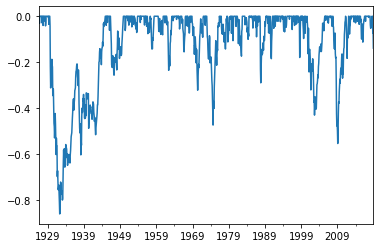

In [17]:
# Plot the drawdown 
drawdown.plot.line()

This is very interesting. The crash of 1929 was much worse than 2000 or 2008 where people lost over 80% of their wealth. This was decimating. Let's look at some important values. 

In [18]:
drawdown.head()

1926-07    0.000000
1926-08    0.000000
1926-09   -0.000900
1926-10   -0.030373
1926-11    0.000000
Freq: M, Name: LargeCap, dtype: float64

Drawdowns are calculating the negative returns and hence, they are between 0 and -1.

In [19]:
# Get the worst drawdown 
drawdown.min()

-0.8585017065044246

In [20]:
drawdown.idxmin()

Period('1932-05', 'M')

The worst drawdown was roughly 84% and it was on 1932-05.

As a time series, there are many operations that we can do on this data. 

In [21]:
# Get the worst drawdown since 1975
print(f"The worst drawdown since 1975 was {drawdown['1975':].min()} on {drawdown['1975':].idxmin()}")

The worst drawdown since 1975 was -0.5527349978713652 on 2009-02


In [22]:
# Get the worst drawdown in the 90s 
print(drawdown['1990':'1999'].min())
print(drawdown['1990':'1999'].idxmin())

-0.18433959531750105
1990-10


Finally, we need to make a combined plot of peaks wealth index to visualise drawdowns.

<AxesSubplot:>

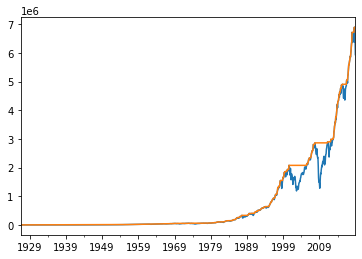

In [23]:
# Combine Plots 
wealth_index.plot.line()
previous_peaks.plot.line()


In [24]:
# Make a drawdown function
def compute_drawdown(return_series: pd.Series):
    '''
        ARGS: 
            Takes in a series of returns
            
        RETURNS:
            Wealth index
            Previous Peaks 
            Percent Drawdowns            
    '''
    
    # Calculate the wealth previous peaks and drawdowns
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    
    # Create a dataframe 
    drawdown_data = pd.DataFrame({'Wealth': wealth_index, 
                                  'Peaks': previous_peaks,
                                  'Drawdown': drawdowns})
    return drawdown_data

In [25]:
# Get the data for small cap stocks 
small_cap_drawdowns = compute_drawdown(returns['SmallCap'])
small_cap_drawdowns

,Wealth,Peaks,Drawdown
1926-07,9.943000e+02,9.943000e+02,0.000000
1926-08,1.032481e+03,1.032481e+03,0.000000
1926-09,1.027525e+03,1.032481e+03,-0.004800
1926-10,9.937196e+02,1.032481e+03,-0.037542
1926-11,9.882542e+02,1.032481e+03,-0.042836
...,...,...,...
2018-08,6.644003e+08,6.644003e+08,0.000000
2018-09,6.508465e+08,6.644003e+08,-0.020400
2018-10,5.823775e+08,6.644003e+08,-0.123454
2018-11,5.661874e+08,6.644003e+08,-0.147822


It's important to plot the wealth and peak together to understand where the biggest dropdowns occurred. 

<AxesSubplot:>

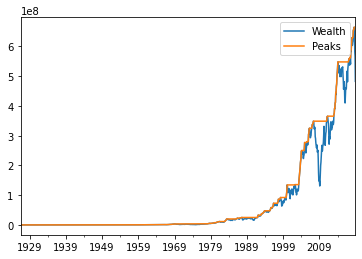

In [26]:
# Lets plot the wealth and the peaks 
small_cap_drawdowns[['Wealth', 'Peaks']].plot.line()

<AxesSubplot:>

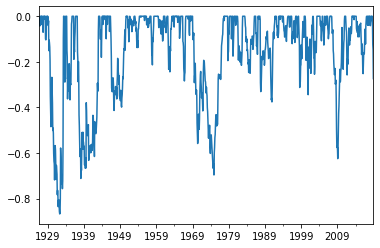

In [27]:
small_cap_drawdowns['Drawdown'].plot.line()

Small Caps generally show more losses and that goes in line with our knowledge of large and small cap stocks. 

In [28]:
small_cap_drawdowns['Drawdown'].min()

-0.8672279770834406

In [29]:
small_cap_drawdowns['Drawdown'].idxmin()

Period('1932-05', 'M')

The damage was also similar in 1932. Let's check for damages since 1975.

In [38]:
# Get the worst drawdown since 1975
print(f"The worst drawdown since 1999 was {small_cap_drawdowns['Drawdown']['1999':'2015'].min()*100} on {small_cap_drawdowns['Drawdown']['1999':'2015'].idxmin()}")

The worst drawdown since 1999 was -62.48092431236988 on 2009-02


In [41]:
# Get the worst drawdown since 1975
print(f"The worst drawdown since 1999 was {drawdown['1999':'2015'].min()*100} on {drawdown['1999':'2015'].idxmin()}")

The worst drawdown since 1999 was -55.273499787136515 on 2009-02


So, the 2008 crash was clearly worse for small cap stocks. 